# LunarLander-v2

"Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine."[OpenAI](https://gym.openai.com/envs/LunarLander-v2/)

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import os

from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.a2c.policies import MlpPolicy
import pandas as pd
from utils.utils import load_log
from utils.utils import plot_log
from utils.utils import record_video

In [2]:
env = make_vec_env('LunarLander-v2', n_envs=10) #create LunarLander environment

#model = A2C("MlpPolicy", env, verbose=1) #create model with MlpPolicy 

#log_dir = "./out/training-log/"
#log_path = log_dir + f"LunarLander-v2/"
#save_dir = "./trained/LunarLander-v2/"

model = A2C.load("./trained/LunarLander-v2/lunarlander_v2_a2c_3M")
model.set_env(env)

In [ ]:
model.learn(
        total_timesteps=3000000, #train the model for 3 million timesteps
        callback=None,
        log_interval=-1,
        eval_env=gym.make('LunarLander-v2'), 
        eval_freq=10000/10, 
        n_eval_episodes=10,
        tb_log_name='A2C',
        eval_log_path=log_path, 
        reset_num_timesteps=False
        )                         #evaluate episode every 10k steps

In [3]:
#Display log

log_dir = "./out/training-log/"
log_path = log_dir + f"LunarLander-v2"

files = [
    log_path + "/evaluations.npz",
   
]

data = pd.concat([load_log(x) for x in files], axis='index')
data.sort_values(by='timesteps', inplace=True)

data

,mean_rew,mean_ep_length
timesteps,,
10000,-2362.840997,387.5
20000,-2147.361178,976.8
30000,-1564.612922,1000.0
40000,-537.056282,932.5
50000,-690.276902,871.4
...,...,...
2960000,61.311124,545.3
2970000,34.387922,506.1
2980000,-8.914978,324.3


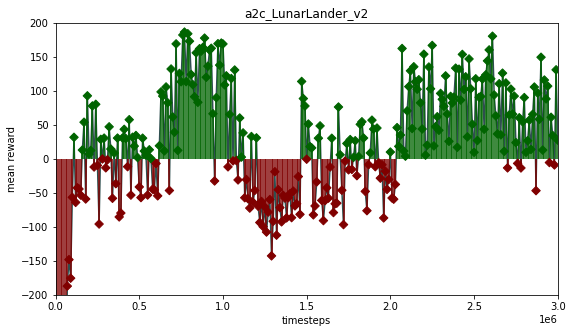

In [5]:
plot_log(data, title='a2c_LunarLander_v2', axis=[0, 3000000, -200, 200]) #plot for 3 million steps

In [ ]:
record_video("LunarLander-v2", model=A2C.load("./trained/LunarLander-v2/lunarlander_v2_a2c_3M"), video_length=5000, prefix='a2c_LunarLander', video_folder='./videos')
#record example video